In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import pickle, os, glob

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


from keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator

Using TensorFlow backend.


In [2]:
df_stratified = pickle.load(open("../Data/stratified_data.p", 'rb'))

In [3]:
df_stratified['articleType'] = df_stratified['articleType'].astype('category')
df_stratified['label'] = df_stratified['articleType'].cat.codes
df_stratified.head()
df_stratified = df_stratified.loc[:, ['id', 'label']]

In [4]:
df_stratified.head()

,id,label
0,55627,0
1,23930,0
2,22114,0
3,8996,0
4,24666,0


In [136]:
img_data, j = [], -1

for i in glob.glob("..//..//images//*//*/*.jpg"):
    temp = load_img(i, target_size = (240, 180, 3))
    temp = img_to_array(temp).flatten()
    temp /= 255
    img_data.append(temp)
    
img_data = np.array(img_data, dtype = float)

In [137]:
img_data.shape

(5000, 129600)

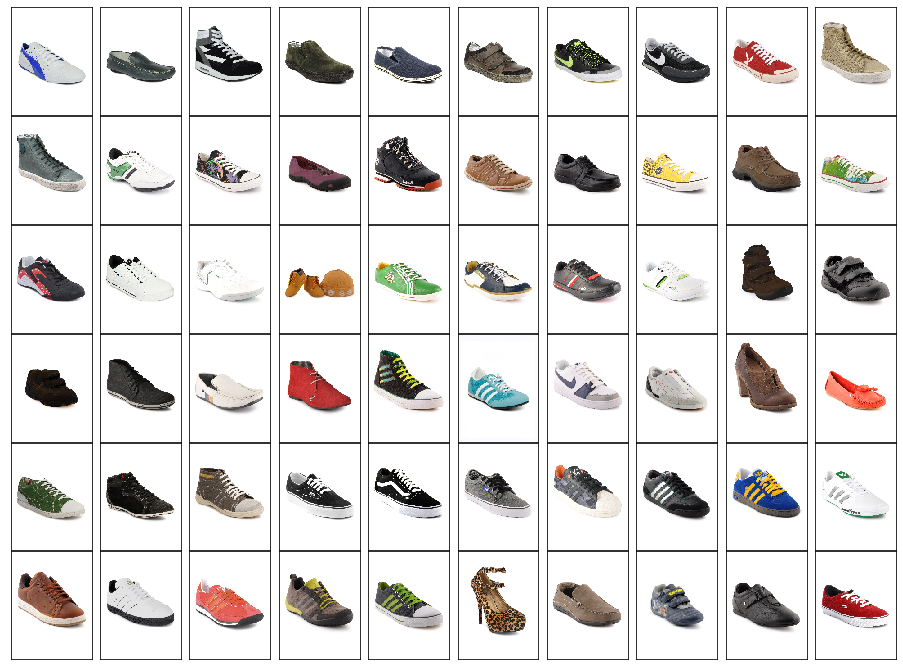

In [138]:
fig, axes = plt.subplots(6, 10, figsize = (16, 12), subplot_kw={'xticks':[], 'yticks':[]}, gridspec_kw=dict(hspace=0.01, wspace=0.01))
for i, ax in enumerate(axes.flat):
    ax.imshow(img_data[i].reshape(240, 180,3))

### PCA Variance Explained

In [91]:
pca_explained_variance_ratio = []
for i in range(1, df_stratified.shape[0] - 1, 100):
    pca = PCA(
        n_components = i,
        svd_solver = 'auto'
    ).fit(img_data)
    
    pca_explained_variance_ratio.append(sum(pca.explained_variance_ratio_))

ValueError: n_components=1001 must be between 0 and min(n_samples, n_features)=1000 with svd_solver='full'

In [92]:
prop_pca = np.zeros(shape = (len(pca_explained_variance_ratio)))
prop_pca[0] = pca_explained_variance_ratio[0]
for i in range(1, len(pca_explained_variance_ratio) - 1):
    prop_pca[i] = pca_explained_variance_ratio[i+1] - pca_explained_variance_ratio[i]

Text(0.5, 1.0, 'Variance v/s Number of Components (for Sports Shoes)')

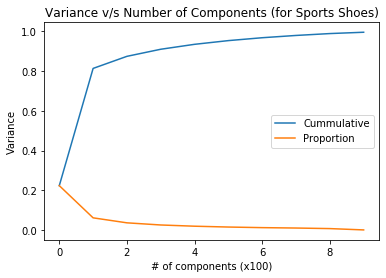

In [93]:
plt.plot(pca_explained_variance_ratio, label = "Cummulative")
plt.plot(prop_pca, label = "Proportion")
plt.xlabel("# of components (x100)")
plt.ylabel("Variance")
plt.legend()
plt.title("Variance v/s Number of Components (for Sports Shoes)")

### tSNE

In [143]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.25849958 0.17398785 0.05171637]


In [144]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(img_data)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 5000 samples in 44.506s...
[t-SNE] Computed neighbors for 5000 samples in 5662.719s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 17.322825
[t-SNE] KL divergence after 250 iterations with early exaggeration: 71.677826
[t-SNE] KL divergence after 300 iterations: 1.992149


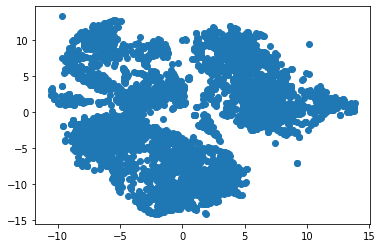

In [145]:
tsne_1 = tsne_results[:, 0]
tsne_2 = tsne_results[:, 1]

plt.scatter(tsne_1, tsne_2)

In [149]:
label = np.array(df_stratified.label)

In [153]:
tsne_results.shape

(5000, 2)

In [163]:
df_result = pd.DataFrame(columns = ['tsne1', 'tsne2', 'label'])

In [164]:
for i, j, k in zip(tsne_1, tsne_2, label):
    df_result = df_result.append({'tsne1' : i, 'tsne2' : j, 'label' : k}, ignore_index=True)

In [171]:
set(df_result.label)

{0.0, 1.0, 2.0, 3.0, 4.0}

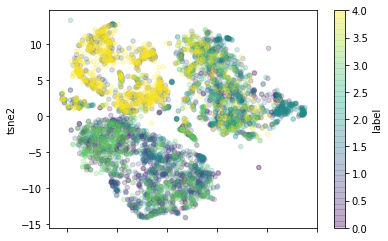

In [173]:
df_result.plot.scatter(
    x = 'tsne1',
    y = 'tsne2',
    c = 'label',
    cmap = 'viridis',
    alpha = 0.2
)

In [179]:
img_data.shape

(5000, 129600)

In [192]:
pca = PCA(
    n_components = 400
)

pca_img_data = pca.fit_transform(img_data)

# pca_1 = pca_img_data[:,0]
# pca_2 = pca_img_data[:,1] 
# pca_3 = pca_img_data[:,2]

In [193]:
tsne_1 = TSNE(n_components = 2, verbose = 1, perplexity = 100, learning_rate = 800)
tsne_results_1 = tsne.fit_transform(pca_img_data)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.154s...
[t-SNE] Computed neighbors for 5000 samples in 13.145s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 15.063419
[t-SNE] KL divergence after 250 iterations with early exaggeration: 70.876045
[t-SNE] KL divergence after 300 iterations: 1.975131


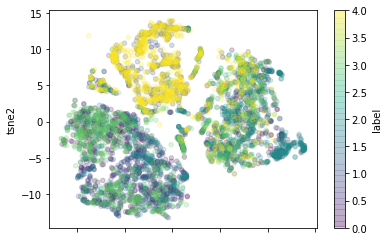

In [194]:
tsne_1_1 = tsne_results_1[:, 0]
tsne_1_2 = tsne_results_1[:, 1]

df_result = pd.DataFrame(columns = ['tsne1', 'tsne2', 'label'])
for i, j, k in zip(tsne_1_1, tsne_1_2, label):
    df_result = df_result.append({'tsne1' : i, 'tsne2' : j, 'label' : k}, ignore_index=True)
    
# df_result.plot.scatter(
#     x = 'tsne1',
#     y = 'tsne2',
#     c = 'label',
#     cmap = 'plasma',
#     alpha = 0.2
# )

Text(0.5, 1.0, 'tSNE Clustering')

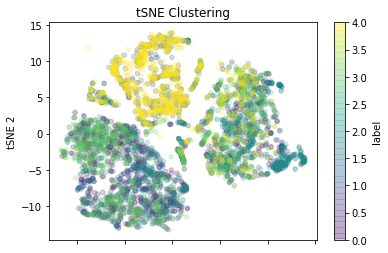

In [207]:
ax = df_result.plot.scatter(
    x = 'tsne1',
    y = 'tsne2',
    c = 'label',
    alpha = 0.2,
    cmap = 'viridis'
)

ax.set_xlabel("tSNE 1")
ax.set_ylabel("tSNE 2")
ax.set_title("tSNE Clustering")

Text(0.5, 1.0, 'PCA Clustering')

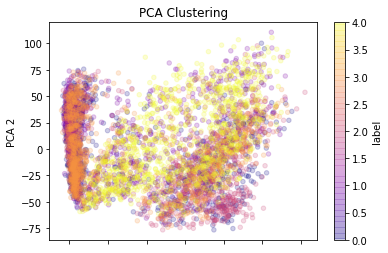

In [213]:
df_result_pca = pd.DataFrame(columns = ['pca1', 'pca2', 'label'])
for i, j, k in zip(pca_img_data[:, 0], pca_img_data[:, 1], label):
    df_result_pca = df_result_pca.append({'pca1' : i, 'pca2' : j, 'label' : k}, ignore_index=True)

ax = df_result_pca.plot.scatter(
    x = 'pca1',
    y = 'pca2',
    c = 'label',
    cmap = 'plasma',
    alpha = 0.2
)

ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_title("PCA Clustering")